The dataset is provided in the "GOLDXYZOSC.0001_1024.hdf5" file. The HDF5 format is designed to store and organize large amounts of data.

The dataset exhibits the following structure:
```
    24 modulations: OOK, ASK4, ASK8, BPSK, QPSK, PSK8, PSK16, PSK32, APSK16, APSK32, APSK64, APSK128, QAM16, QAM32, QAM64, QAM128, QAM256, AMSSBWC, AMSSBSC, AMDSBWC, AMDSBSC, FM, GMSK and OQPS.
    26 SNRs per modulation (-20 dB to +30 dB in steps of 2dB).
    4096 frames per modulation-SNR combination.
    1024 complex time-series samples per frame.
    Samples as floating point in-phase and quadrature (I/Q) components, resulting in a (1024,2) frame shape.
    2.555.904 frames in total.
```
Each frame can be retrieved by accessing the HDF5 groups:
```
    X: I/Q components of the frame;
    Y: Modulation of the frame (one-hot encoded)
    Z: SNR of the frame
```
Data consist of 24 Modulations --> 26 SNR --> 4096 Frames --> (1024, 2) I/Q Samples. Below is a structural example of the dataset:

```
Modulation 0: {
    SNR -20: [
            Frame 0:                # sample 0 (e.g. hdf5_file['X'][0])
                [
                    [I0, Q0],       # sample 0.0 (e.g. hdf5_file['X'][0][0])
                    [I1, Q1],       # sample 0.1 (e.g. hdf5_file['X'][0][1])
                    ...,
                    [I1023, Q1023]  # sample 0.1023 (e.g. hdf5_file['X'][0][1023])
                ],
            Frame 1: [ ... ]    # sample 1 (e.g. hdf5_file['X'][1])
            ...,
            Frame 4094: [ ... ] # sample 4094 (e.g. hdf5_file['X'][4094])
            Frame 4095: [ ... ] # sample 4095 (e.g. hdf5_file['X'][4095])
        ]
    SNR -18: [
            Frame 0: [ ... ]    # sample 4096 (e.g. hdf5_file['X'][4096])
            ...,
            Frame 4095: [ ... ] # sample 8191 (e.g. hdf5_file['X'][8191])
        ]
    ...
    SNR 30: [
            Frame 0: [ ... ]    # sample 102400 (e.g. hdf5_file['X'][102400])
            ...,
            Frame 4095: [ ... ] # sample 106495 (e.g. hdf5_file['X'][106495])
        ]
}
...
Modulation 23: {
    ...
}
```

In [1]:
import h5py
import numpy as np
import json


xyz = h5py.File("../data/GOLD_XYZ_OSC.0001_1024.hdf5", "r")
modulation_classes = json.load(open("../data/classes-fixed.json"))

frame = xyz["X"]
modulation_onehot = xyz["Y"]
snr = xyz["Z"]

assert len(modulation_classes) == modulation_onehot[0].shape[0]
int_to_modulation = {i: modulation for i, modulation in enumerate(modulation_classes)}


def onehot_to_int(onehot):
    return np.argmax(onehot)


int_to_modulation


{0: 'OOK',
 1: '4ASK',
 2: '8ASK',
 3: 'BPSK',
 4: 'QPSK',
 5: '8PSK',
 6: '16PSK',
 7: '32PSK',
 8: '16APSK',
 9: '32APSK',
 10: '64APSK',
 11: '128APSK',
 12: '16QAM',
 13: '32QAM',
 14: '64QAM',
 15: '128QAM',
 16: '256QAM',
 17: 'AM-SSB-WC',
 18: 'AM-SSB-SC',
 19: 'AM-DSB-WC',
 20: 'AM-DSB-SC',
 21: 'FM',
 22: 'GMSK',
 23: 'OQPSK'}

In [4]:
idx = -1
modulation_str = int_to_modulation[onehot_to_int(modulation_onehot[idx])]
print(
    f"Frame: {idx}\n"
    f"\t- Modulation: {modulation_str}\n"
    f"\t- SNR: {snr[idx]}\n"
    f"\t- Samples: {frame[idx].shape}"
)


Frame: -1
	- Modulation: OQPSK
	- SNR: [30]
	- Samples: (1024, 2)


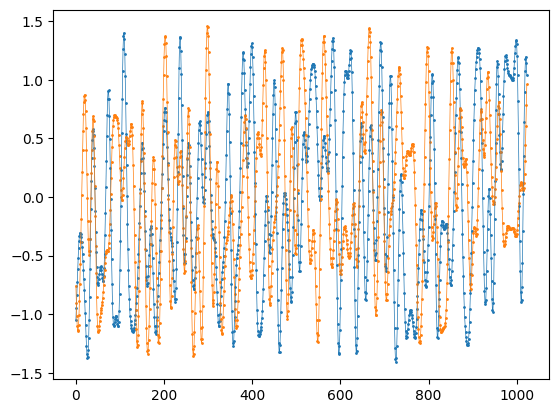

In [16]:
from matplotlib import pyplot as plt


plt.scatter([i for i in range(1024)], frame[idx][:, 0], s=1)
plt.scatter([i for i in range(1024)], frame[idx][:, 1], s=1)
plt.plot(frame[idx], linewidth=0.5)